<a href="https://colab.research.google.com/github/alangttl2/Pr-ctica-2-Centro-de-Llamadas/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se han truncado las últimas 5000 líneas del flujo de salida.

Hora de llegada: [2111490.]
Hora de iterarribo: [1.]
Hora de salida: [61.]
Tipo de llamada: 0
[2111490.][1.][61.]Tipo de cliente: Normal, 

Hora de llegada: [2111496.]
Hora de iterarribo: [1.]
Hora de salida: [5.]
Tipo de llamada: 1
[2111496.][1.][5.]Tipo de cliente: Premier, 

Hora de llegada: [2111522.]
Hora de iterarribo: [2.]
Hora de salida: [24.]
Tipo de llamada: 1
[2111522.][2.][24.]Tipo de cliente: Premier, 

Hora de llegada: [2111569.]
Hora de iterarribo: [1.]
Hora de salida: [46.]
Tipo de llamada: 1
[2111569.][1.][46.]Tipo de cliente: Premier, 

Hora de llegada: [2111573.]
Hora de iterarribo: [2.]
Hora de salida: [2.]
Tipo de llamada: 0
[2111573.][2.][2.]Tipo de cliente: Normal, 

Hora de llegada: [2111605.]
Hora de iterarribo: [2.]
Hora de salida: [30.]
Tipo de llamada: 0
[2111605.][2.][30.]Tipo de cliente: Normal, 

Hora de llegada: [2111643.]
Hora de iterarribo: [3.]
Hora de salida: [35.]
Tipo de llamada: 1
[2111

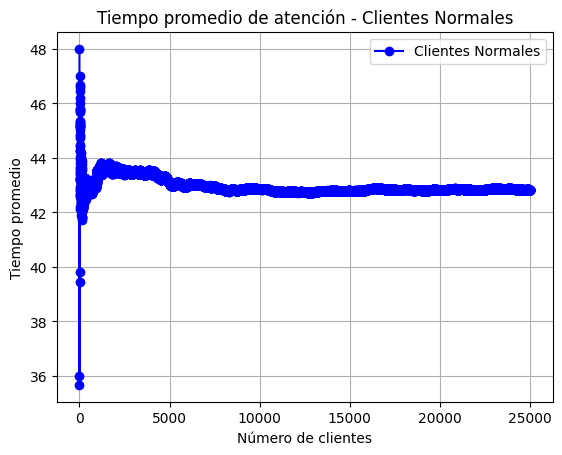

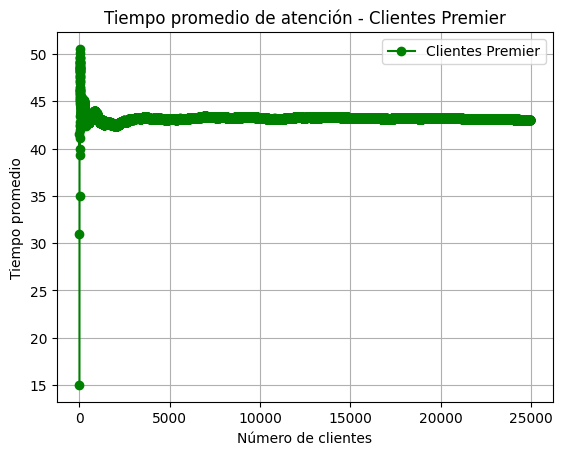

Soy la cola normal: [array([48.]), array([24.]), array([35.]), array([70.]), array([22.]), array([72.]), array([5.]), array([61.]), array([63.]), array([66.]), array([51.]), array([25.]), array([62.]), array([6.]), array([38.]), array([33.]), array([66.]), array([58.]), array([56.]), array([44.]), array([7.]), array([74.]), array([27.]), array([50.]), array([82.]), array([69.]), array([7.]), array([24.]), array([61.]), array([67.]), array([47.]), array([15.]), array([54.]), array([51.]), array([48.]), array([75.]), array([27.]), array([48.]), array([56.]), array([12.]), array([8.]), array([19.]), array([26.]), array([30.]), array([68.]), array([12.]), array([42.]), array([36.]), array([20.]), array([64.]), array([76.]), array([64.]), array([52.]), array([19.]), array([17.]), array([30.]), array([77.]), array([40.]), array([42.]), array([42.]), array([22.]), array([80.]), array([65.]), array([26.]), array([3.]), array([8.]), array([35.]), array([82.]), array([27.]), array([35.]), array(

In [29]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Usuario:
    """Clase que representa un usuario."""

    def __init__(self, h_ll, h_i, h_s, tipo):
        """Constructor de la clase Usuario."""
        self.h_llegada = h_ll
        self.h_iterarribo = h_i
        self.h_salida = h_s
        self.tipo_de_cliente = tipo

    def __str__(self):
        """Método para imprimir los atributos del usuario en formato legible."""
        cadena_de_impresion = ''
        cadena_de_impresion += str(self.h_llegada)
        cadena_de_impresion += str(self.h_iterarribo)
        cadena_de_impresion += str(self.h_salida)
        if self.tipo_de_cliente == 0:
            cadena_de_impresion += 'Tipo de cliente: Normal, \n'
        else:
            cadena_de_impresion += 'Tipo de cliente: Premier, \n'
        return cadena_de_impresion

def tipo_de_llamada():
    """Genera aleatoriamente el tipo de llamada."""
    cola_prio = ["0", "1"]
    tipo = random.randint(0, 1)
    return cola_prio[tipo]

def cronometro(i, j, k):
    """Calcula el cronómetro sumando tres valores."""
    h_calculado = i + j + k
    return h_calculado

if __name__ == "__main__":#Definira todas las variablees de nuestra simulación
    num_llamadas = int(input("Ingrese el número de llamadas: "))
    num_llamadas += 1
    operadores = 19
    cuenta_premier = 1
    cuenta_normal = 0
    cuenta_operador = 1
    cuenta_llamadas = 1
    cuenta_llamadas_espera = 1
    cola_normal = []
    cola_premier = []
    cola_espera = []
    hr_inicio = 0
    linea_ocupada = 0

    with open("/content/reporte_llamada", 'w') as outfile:
        inicio = 'Comienza la simulación:\n'
        outfile.write(inicio)

    h_llegada = hr_inicio
    if num_llamadas <= operadores:
        operadores = num_llamadas

    while cuenta_llamadas < num_llamadas:
        print("Estoy en llamada: ", cuenta_llamadas)
        while cuenta_operador <= operadores:
            h_iterarribo = np.round(np.random.uniform(low=1, high=3, size=1), 0)
            h_salida = np.round(np.random.uniform(low=1, high=81, size=1), 0)
            if linea_ocupada == 0:
                h_llegada = np.round(np.random.uniform(low=1, high=3, size=1), 0)
            else:
                h_llegada = cronometro(h_llegada, h_iterarribo, h_salida)

            tipo = tipo_de_llamada()

            print("Hora de llegada:", h_llegada)
            print("Hora de iterarribo:", h_iterarribo)
            print("Hora de salida:", h_salida)
            print("Tipo de llamada:", tipo)

            var_llamada = f"Llamada {cuenta_llamadas}:\nOperador {cuenta_operador}\n"
            if tipo == "0":
                usr_nrml = Usuario(h_llegada, h_iterarribo, h_salida, int(tipo))
                print(usr_nrml)
                cola_normal.append(h_iterarribo + h_salida)
            else:
                usr_prmr = Usuario(h_llegada, h_iterarribo, h_salida, int(tipo))
                cola_premier.append(h_iterarribo + h_salida)
                print(usr_prmr)

            with open("/content/reporte_llamada", 'a') as outfile:
                outfile.write(str(var_llamada))

            cuenta_operador += 1
            cuenta_llamadas += 1
            cuenta_premier += 1

        cuenta_operador = 1
        linea_ocupada += 1

        # valor máximo
        maximo_h_salida = max(cola_normal)
        print("Valor máximo cola normal:", maximo_h_salida)
        maximo_cola_premier = max(cola_premier)
        print("Valor máximo cola premier:", maximo_cola_premier)

        # calcula llamadas faltantes
        calcula_llamadas_faltantes = num_llamadas - cuenta_llamadas
        for cuenta_llamadas_espera in range(calcula_llamadas_faltantes):
            cola_espera.append(f"Llamada: {cuenta_llamadas_espera}")
            cuenta_llamadas_espera += 1

        if calcula_llamadas_faltantes > operadores:
            print(f"El sistema está saturado, hay {len(cola_espera)} llamadas en espera.")

        if calcula_llamadas_faltantes < operadores:
            operadores = calcula_llamadas_faltantes

    # Graficar para clientes normales
    if len(cola_normal) > 0:
        tiempos_promedio_normal = [np.mean(cola_normal[:i+1]) for i in range(len(cola_normal))]
        llamadas_normal = list(range(1, len(cola_normal) + 1))
        plt.figure()
        plt.plot(llamadas_normal, tiempos_promedio_normal, label='Clientes Normales', marker='o', color='blue')
        plt.xlabel('Número de clientes')
        plt.ylabel('Tiempo promedio')
        plt.title('Tiempo promedio de atención - Clientes Normales')
        plt.grid(True)
        plt.legend()
        plt.show()

    # Graficar para clientes premier
    if len(cola_premier) > 0:
        tiempos_promedio_premier = [np.mean(cola_premier[:i+1]) for i in range(len(cola_premier))]
        llamadas_premier = list(range(1, len(cola_premier) + 1))
        plt.figure()
        plt.plot(llamadas_premier, tiempos_promedio_premier, label='Clientes Premier', marker='o', color='green')
        plt.xlabel('Número de clientes')
        plt.ylabel('Tiempo promedio')
        plt.title('Tiempo promedio de atención - Clientes Premier')
        plt.grid(True)
        plt.legend()
        plt.show()

    print("Soy la cola normal:", cola_normal)
    print("Soy la cola premier:", cola_premier)
